# Project: Investigate a Dataset "No-show Appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:
* `PatientID` - Identification number associated with each unique patient
* `AppointmentID` - 7 digits unique identification number of each appointment
* `Gender` - 'F' for Female and 'M' for Male
* `ScheduledDay` - The day someone called or registered the appointment
* `AppointmentDay` - The day of the actual appointment, when patient have to visit doctor
* `Age` - How old is the patient
* `Neighbourhood` - Where the appointment takes place. Indicates the location of the hospital
* `Scholarship` - Indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia). 0 = No, 1 = Yes
* `Hipertension` - If patient have mentioned condition. 0 = No, 1 = Yes
* `Diabetes` - If patient have mentioned condition. 0 = No, 1 = Yes
* `Alcoholism` - If patient have mentioned condition. 0 = No, 1 = Yes
* `Handcap` - If patient have handicapping conditions. 0 = No, 1 = 1 handicapping condition, 2 = 2 handicapping conditions etc.
* `SMS_received` - If patient was reminded by SMS about upcomming appointment. 0 = No, 1 = Yes
* `No-show` - It says 'No' if the patient showed up to their appointment, and 'Yes' if they did not show up

In this investigation I will try to answer next question: "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?".

To operate data, make analysis and visualization I choose Python 3.7 Anaconda distribution with Jupyter Notebook as Development Environment. Notebook, Anaconda environment YAML file and dependencies can be found in [my GitHub repository](https://github.com/Wildbird74/No-show-Appointments).

In next snippet you can find list of all libraries which will be used for analysis.

In [1]:
# For importing data from CSV, dataframe manipulations and basic visualization
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Enabling graph to be shown in Jupyter Notebook directly
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Let's read data from CSV file.

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### General Properties

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Data Cleaning

Observation for Data Cleaning step:
1. It will be beneficial to convert all column names to conventional naming format (underscore instead of hyphen, low letters etc.)
2. `AppointmentID` as unique identificator of each entry can be used as Index
3. `PatientId` have data type Float, but should be Int
4. `ScheduledDay` and `AppointmentDay` has types Str, but should be Datetime
5. I believe that for analysis will be usefull to calculate `lead_time`, which are `AppointmentDay`-`ScheduledDay` and must be >= 0
  * Because `ScheduledDay` have Date and Time information, but `AppointmentDay` only Date information, so `lead_time` for reservation on the same day will have value of -1. To fix this I will remove Time information from `ScheduledDay`
  * There might be other situations, where `lead_time` will be less than 0 (same day reservation), which is obviously a mistake. All such entries will be dropped from dataset
6. `Age` have values, which are less than 0. All such entries will be dropped from dataset
7. There are no duplicates in dataset, as every line have unique `AppointmentID`, need to validate any duplicates w/o this column, as it might be that same appointment was saved twice with different ID. If there will be any duplicates - they will be removed

1. Conventional naming format

In [8]:
# In all columns names removing leading and trailing characters, make characters lowercased, replace hyphen with undescore
df.rename(columns=lambda x:x.strip().lower().replace("-", "_"), inplace=True)

# Separating words with underscores and changing Spanish to English words
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'hipertension':'hypertension', 'handcap':'handicap'}, inplace=True)

2. Make `appointment_id` an Index

In [9]:
df.set_index('appointment_id', inplace=True)

3. Change format of `patient_id` to Int

In [10]:
# Checking what the biggest value in `patient_id` to decide if int32 will be enough
df['patient_id'].max()

999981631772427.0

* int32	Integer (-2147483648 to 2147483647)
* int64	Integer (-9223372036854775808 to 9223372036854775807)

So we should use int64

In [11]:
df['patient_id'] = df['patient_id'].astype('int64')

4. Convert `scheduled_day` and `appointment_day` to DateTime

In [12]:
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

5. Create `lead_time` and validate mistakes in data

In [13]:
# Use normalize on `scheduled_day` to nullify time data
df.scheduled_day = df.scheduled_day.dt.normalize()

# Create `lead_time` column in days
df['lead_time'] = (df.appointment_day - df.scheduled_day).dt.days

In [14]:
# Checking if there are any `lead_time` which less than 0
df.query('lead_time < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
appointment_id,,,,,,,,,,,,,,
5679978,7839272661752,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
5715660,7896293967868,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
5664962,24252258389979,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
5686628,998231581612122,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
5655637,3787481966821,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [15]:
# Dropping wrong entries
df = df[df.lead_time >= 0]

In [16]:
# Validating that there are no wrong entries anymore
df.query('lead_time < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
appointment_id,,,,,,,,,,,,,,


6. Clean mistakes in `age`

In [17]:
# Checking how many entries of the `age` which less than 0
df.query('age < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
appointment_id,,,,,,,,,,,,,,
5775010,465943158731293,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,0


In [18]:
# Dropping wrong entries
df = df[df.age >= 0]

In [19]:
# Validating that there are no wrong entries anymore
df.query('age < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
appointment_id,,,,,,,,,,,,,,


7. Checking for duplicates after cleaning

In [20]:
# Count number of duplicated rows
df.duplicated().sum()

4222

I can see 2 possible explanations for duplicates:

1. There are mistake in database handling
2. People did several reservation on the same day 
  * Appointment time change (new appointment was added, but old one was not deleted)
  * Several appointments on the same day for different doctors

Because there are no way to validate reasons for this duplicates, we will drop them.

In [21]:
df.drop_duplicates(inplace=True)

Rows count in dataset after cleaning should be 110,527 - 5 (invalid `lead_time`) - 1 (invalid `age`) - 4,222 (duplicates) = 106,299

In [22]:
df.shape

(106299, 14)

Let's check general properties one more time to confirm cleaning process

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106299 entries, 5642903 to 5629448
Data columns (total 14 columns):
patient_id         106299 non-null int64
gender             106299 non-null object
scheduled_day      106299 non-null datetime64[ns, UTC]
appointment_day    106299 non-null datetime64[ns, UTC]
age                106299 non-null int64
neighbourhood      106299 non-null object
scholarship        106299 non-null int64
hypertension       106299 non-null int64
diabetes           106299 non-null int64
alcoholism         106299 non-null int64
handicap           106299 non-null int64
sms_received       106299 non-null int64
no_show            106299 non-null object
lead_time          106299 non-null int64
dtypes: datetime64[ns, UTC](2), int64(9), object(3)
memory usage: 12.2+ MB


In [24]:
df.describe()

,patient_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,lead_time
count,1.062990e+05,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000,106299.000000
mean,1.467593e+14,37.116661,0.098072,0.198958,0.072748,0.027987,0.021872,0.333719,10.409336
std,2.551417e+14,23.173150,0.297414,0.399218,0.259723,0.164937,0.160262,0.471543,15.369584
min,3.921700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.151415e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.154590e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433654e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [25]:
df.nunique()

patient_id         62298
gender                 2
scheduled_day        111
appointment_day       27
age                  103
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
no_show                2
lead_time            129
dtype: int64

In [26]:
df.isnull().sum()

patient_id         0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
lead_time          0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [32]:
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

In [33]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106299 entries, 5642903 to 5629448
Data columns (total 14 columns):
patient_id         106299 non-null int64
gender             106299 non-null int64
scheduled_day      106299 non-null datetime64[ns, UTC]
appointment_day    106299 non-null datetime64[ns, UTC]
age                106299 non-null int64
neighbourhood      106299 non-null object
scholarship        106299 non-null int64
hypertension       106299 non-null int64
diabetes           106299 non-null int64
alcoholism         106299 non-null int64
handicap           106299 non-null int64
sms_received       106299 non-null int64
no_show            106299 non-null int64
lead_time          106299 non-null int64
dtypes: datetime64[ns, UTC](2), int64(11), object(1)
memory usage: 12.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

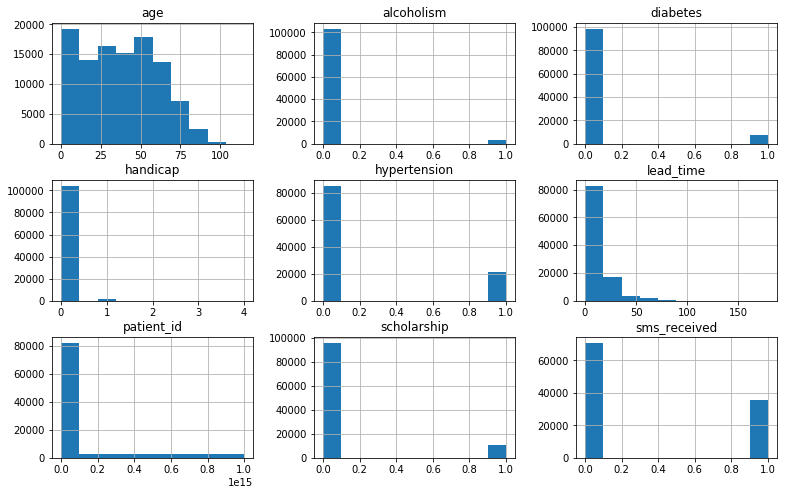

In [40]:
df.hist(figsize=(13, 8));

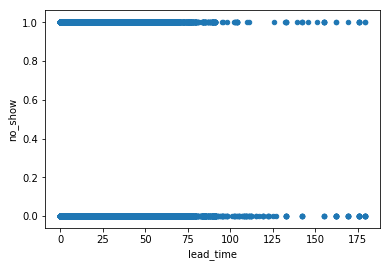

In [34]:
df.plot(x="lead_time", y="no_show", kind="scatter");

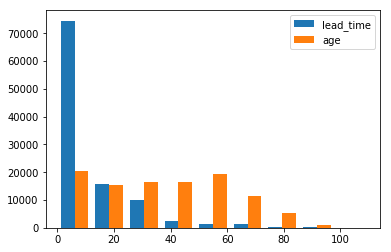

In [37]:
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
#axs[0].hist(df.lead_time, bins=np.linspace(0, 130, 10))
plt.hist([df.lead_time, df.age], bins=np.linspace(0, 110, 10), label=['lead_time', 'age'])
plt.legend(loc='upper right')
plt.show()
#axs[1].hist(df.age)

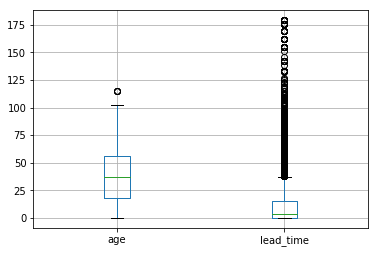

In [28]:
boxplot = df.boxplot(column=['age', 'lead_time'])

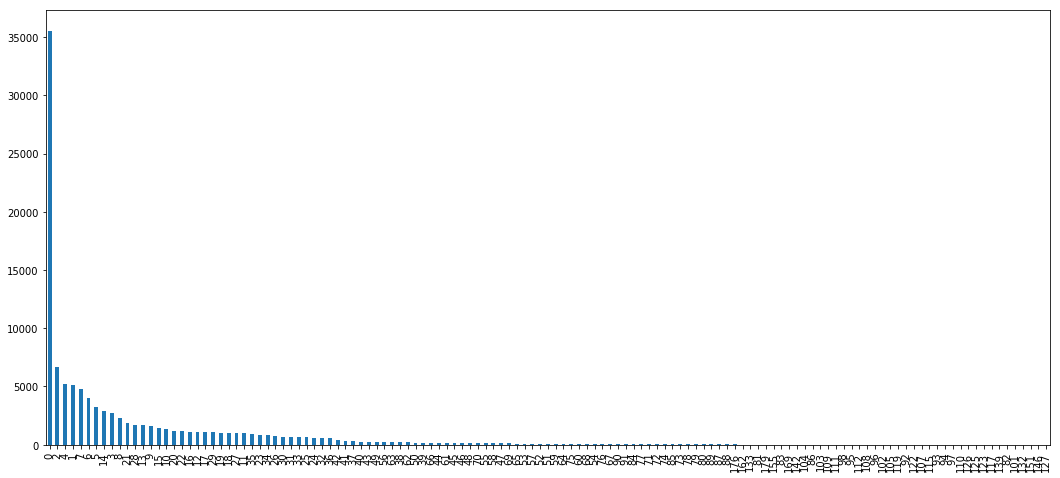

In [31]:
df['lead_time'].value_counts().plot('bar', figsize=(18, 8));

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!